<a href="https://colab.research.google.com/github/Prashanth1719/Slash-mark-Projects/blob/main/Basic_Ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('weather.csv')
#Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

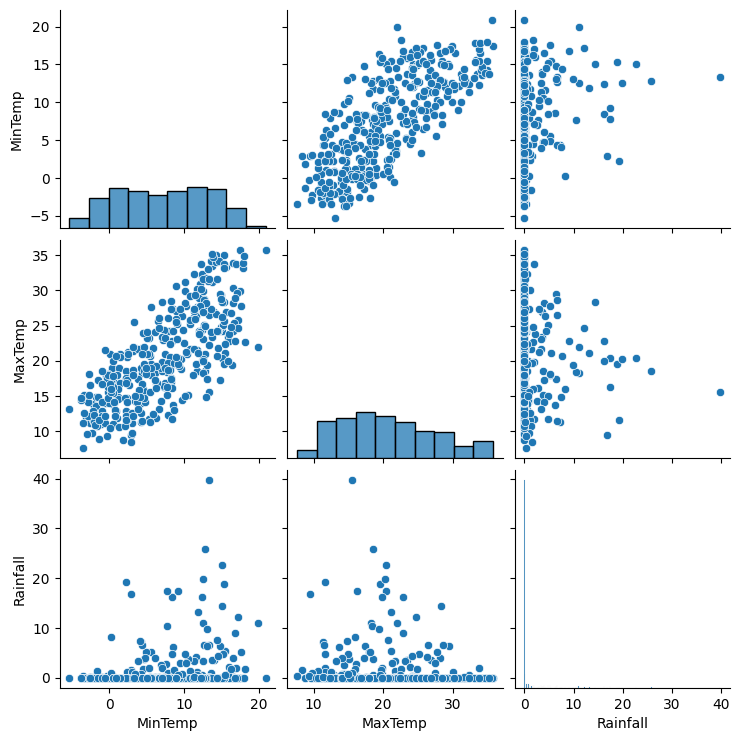

In [3]:
# Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [42]:
start_date = '2022-01-01'  #  choose any start date
num_rows = len(df)  # Number of rows
df['Date'] = pd.date_range(start=start_date, periods=num_rows, freq='D')
# Extract month from the virtual 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month
# Calculate average MaxTemp by month
monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()

# Print the result
print("Average MaxTemp by Month:")
print(monthly_avg_max_temp)

Average MaxTemp by Month:
Month
1     25.068750
2     24.635714
3     29.312903
4     25.230000
5     25.974194
6     19.633333
7     17.112903
8     14.664516
9     11.610000
10    12.741935
11    18.026667
12    22.593548
Name: MaxTemp, dtype: float64


In [43]:
start_date = '2022-01-01'  # You can choose any start date
num_rows = len(df)  # Number of rows
df['Date'] = pd.date_range(start=start_date, periods=num_rows, freq='D')
df['Month'] = df['Date'].dt.month
# Calculate average MaxTemp by month
monthly_avg_min_temp = df.groupby('Month')['MinTemp'].mean()

# Print the result
print("Average MinTemp by Month:")
print(monthly_avg_min_temp)

Average MinTemp by Month:
Month
1     11.875000
2     13.157143
3     15.141935
4     13.206667
5     10.806452
6      5.563333
7      2.509677
8      4.241935
9      0.006667
10     0.041935
11     3.986667
12     6.867742
Name: MinTemp, dtype: float64


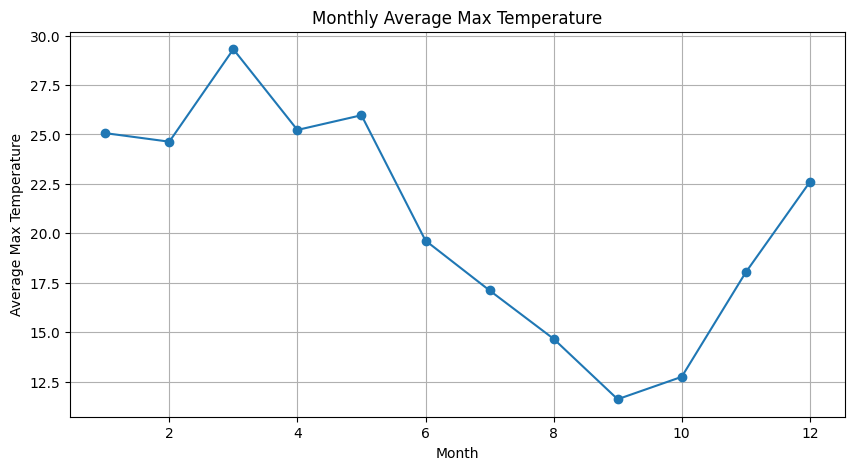

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()


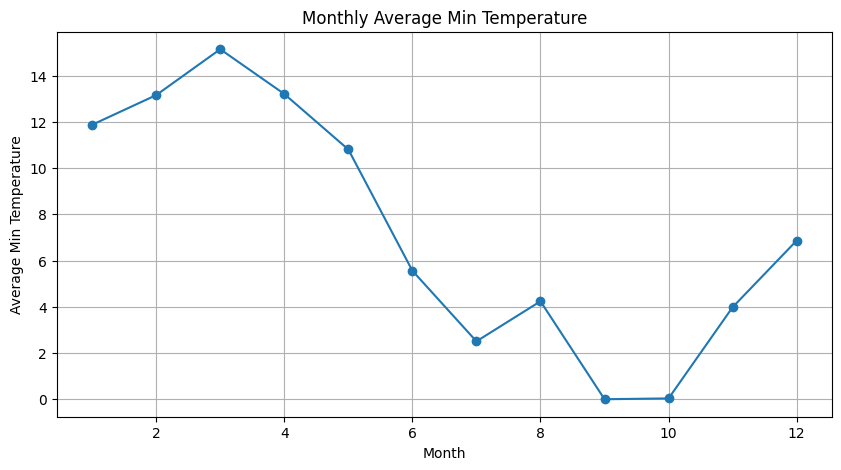

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_min_temp.index, monthly_avg_min_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature')
plt.title('Monthly Average Min Temperature')
plt.grid(True)
plt.show()


In [46]:
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.0768456005826


In [50]:
# Step 8: Conclusions and Insights
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')

Highest rainfall month: 3, Lowest rainfall month: 9
